In [58]:
#Load in the olympic data to explore
#Type: CSV (Tpye: 1)
#Source: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results 
#Note: Kaggle dataset '120 years of olympic history, athletes, and result' (Source #1)

import pandas as pd

#Function 1: 'explore_data' 
#Inputs: medal type, sport, year
#Description: 
# Simple function designed for me to explore and filter through the olympic data by year, sport, and medal.
# To edit specific conditions you must edit the "medals", "sports", and "date" variables manually, there are 
# no user inputs. All variables are required. You can only filter by one sport, medal type, or date 
def explore_data(medals, sports, date):
    
    # Open the file for reading
    data = pd.read_csv('athlete_events.csv')

    # Filter the data to only include years between 1990 and 2021 (Forbes dataset is limited to these years), 
    # medals that are defined, and sports that are defined
    data = data[(data['Year'] >= 1990) & (data['Year'] <= 2021) & (data['Year'] == date) & (data['Medal'] == medals) & (data['Sport'] == sports)]

    # Return the filtered result set
    return data

#Define the acceptable medals, sports, and year
medals = 'Gold'
sports = 'Cycling'
date = 1992

#run the function
explore_data(medals, sports, date)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
23686,12443,"Christopher Miles ""Chris"" Boardman",M,23.0,175.0,70.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Cycling,"Cycling Men's Individual Pursuit, 4,000 metres",Gold
36480,18760,Fabio Casartelli,M,21.0,185.0,72.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Cycling,"Cycling Men's Road Race, Individual",Gold
56156,28779,Bernd Dittert,M,31.0,186.0,86.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Cycling,Cycling Men's 100 kilometres Team Time Trial,Gold
68976,35175,Jens Fiedler,M,22.0,185.0,94.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Cycling,Cycling Men's Sprint,Gold
74043,37613,Guido Fulst,M,22.0,180.0,78.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Gold
80374,40793,Michael Glckner,M,23.0,181.0,73.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Gold
135888,68371,Jens Lehmann,M,24.0,188.0,82.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Gold
141832,71147,Giovanni Lombardi,M,23.0,178.0,75.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Cycling,Cycling Men's Points Race,Gold
157755,79194,Christian Meyer,M,22.0,185.0,67.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Cycling,Cycling Men's 100 kilometres Team Time Trial,Gold
163259,81956,Jos Manuel Moreno Perin,M,23.0,180.0,79.0,Spain,ESP,1992 Summer,1992,Summer,Barcelona,Cycling,"Cycling Men's 1,000 metres Time Trial",Gold


In [1]:
#Load in the olympic country, sport, and medal count data.
#Type: csv (Type: 1)
#Source: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results (Source #1)
#Note: Same source file as function 1 'explore data' -- Kaggle dataset '120 years of olympic history, athletes, and result'


import pandas as pd


# Function 2: 'filter_olympic_data'
# Inputs: medal type, sport, year, team(country)
# Description: 
# This function is a more advanced version of 'explore_data'. The purpose of this is to allow me to 
# filter by multiple sports or medal types as opposed to only one. In addition, I have added a condition to filter
# by team (country). The team condition is set as an optional parameter to explore all countries if desired.
# Lastly, I have added an aggregation method that counts the number of medals, grouped by sport, team, and medal 
# type. This count will serve as our Independant variable in a later function as the metric for olympic success.
# Note:
# To edit specific conditions you must edit the "medals", "sports", "team", and "date" variables manually. The 
# teams(country) variable is optional while the rest are required. You can filter by multiple sports and medal 
# types. You can filter to one date and one team(country). Wriite sports wiith capital first letters ie. Soccer
# Make sure to pick olympic years!!!!!!!!!!!

def filter_olympic_data(medals_to_include, sports_to_include, year, team_filter=None):
    # Open the file for reading
    data = pd.read_csv('athlete_events.csv')

    # Filter the data to only include years between 1990 and 2021, medals that are in the defined list, 
    # and sports that are in the defined list. Filter year and team if specified.
    if team_filter is not None:
        data = data[(data['Year'] >= 1990) & (data['Year'] <= 2021) & (data['Year'] == year) & 
                    (data['Medal'].isin(medals_to_include)) & (data['Sport'].isin(sports_to_include)) & 
                    (data['Team'] == team_filter)]
    else:
        data = data[(data['Year'] >= 1990) & (data['Year'] <= 2021) & (data['Year'] == year) & 
                    (data['Medal'].isin(medals_to_include)) & (data['Sport'].isin(sports_to_include))]

    # Group the data by 'Sport', 'Team', and 'Medal', and count the number of rows for each group
    # Aggregate method (.reset_index) source 'https://stackoverflow.com/questions/39778686/pandas-reset-index-after-groupby-value-counts'
    final_data = data.groupby(['Sport', 'Team', 'Medal']).size().reset_index(name='Count')

    # Return the grouped data (only relevant columns)
    return final_data[['Medal', 'Team', 'Sport', 'Count']]

# Define the acceptable medals and sports
medals = ['Gold', 'Silver', 'Bronze']
sports = ['Soccer', 'Tennis', 'Track','Cycling','Basketball']
date = 2004
team = 'United States'

# Call the function and display the output
output_data = filter_olympic_data(medals, sports, date, team)
print(output_data)



    Medal           Team       Sport  Count
0  Bronze  United States  Basketball     12
1    Gold  United States  Basketball     12
2  Silver  United States     Cycling      2
3  Silver  United States      Tennis      1


In [6]:
#Load in Earnings data from Forbes for filtering
#Type: CSV (Type #1)
#Source: https://www.kaggle.com/datasets/darinhawley/forbes-high-paid-athletes-19902021
#Note: Kaggle dataset 'Forbes Highest Paid Athlethes 1990-2021' (Source #2)


import pandas as pd

#Function 3: 'get_forbes'
#Inputs: year, sport, nationality
#Description:
# Function designed to filter through the forbes dataset by year, sport, and nationality so that it can match the 
# conditions of function 2. Returns average earnings for athletes in a particular sport or nationality during a 
# specified year. Average earnings will serve as the first of our two dependant variables in this study, 
# representing increased or decreased 'sports valuation in a country'. when specifying nationality in this 
# particular function, some are codes ie. USA, UK and others are full names ie. Brazil, Argentina, Russia.
def get_forbes(year, sport, nationality=None):
    
    # Read the file into a pandas DataFrame
    data = pd.read_csv('Forbes_Athletes_1990_2021.csv')

    # Define the sports to include list
    sports_to_include = []

    #append the user inputted sport to the list made
    sports_to_include.append(sport)
    
    # Filter the data to only include rows where the sport is in the defined list and equal to the input year
    data = data[(data['Sport'].isin(sports_to_include)) & (data['Year'] == int(year))]

    # Filter the data further by nationality if a value is provided for that parameter
    if nationality:
        data = data[data['Nationality'] == nationality]

    # Calculate the average earnings from the filtered data
    avg_earnings = data['Earnings'].mean()

    # Display the filtered contents of the file and the average earnings
    print(data)
    print("Average earnings: $", avg_earnings)

#Define inputs and run function
year = input("Enter the year: ")
sport = input("Enter the sport: ")
nationality = input("Enter the nationality (optional): ")
get_forbes(year, sport, nationality)



Enter the year: 2007
Enter the sport: Basketball
Enter the nationality (optional): USA
                 Name Nationality  Earnings  Year       Sport
55      Allen Iverson         USA      23.3  2007  Basketball
854     Kevin Garnett         USA      24.3  2007  Basketball
891       Kobe Bryant         USA      32.9  2007  Basketball
937      Lebron James         USA      27.3  2007  Basketball
1090   Michael Jordan         USA      31.0  2007  Basketball
1465  Shaquille ONeal         USA      31.9  2007  Basketball
Average earnings: $ 28.450000000000003


In [18]:
#GET GDP FUNCTION
#Type:
# JSON API (Type #2)

#Source: 
# (Home page) https://data.worldbank.org/indicator/NY.GDP.MKTP.CD 
# (Api Documentation) https://datahelpdesk.worldbank.org/knowledgebase/articles/898599-indicator-api-queries

#Note: 
# The World Bank 'GDP (Current US$)' (Source #3)

import requests



#Function 4: 'get_country_gdp'
#Inputs: year, country
#Description:
# Function designed to query the world bank api for the gdp of a specified country in a specified year. The 
# function then runs the same query for the following year and calculates the difference between the averages.
# As output, the console will display the GDP for each year as well as the difference in GDP. In a future function
# the difference in GDP will serve as our second Dependent Variable as a metric for 'Change in GDP'. To do this 
# I will convert the print statement to a return that only return the difference in gdp


def get_country_gdp(year, country_name):
    
    # Make a request to get the available countries and their codes
    response = requests.get("https://api.worldbank.org/v2/country?per_page=500&format=json")
    countries = response.json()[1]

    # Create a dictionary with country names and their ID codes
    country_codes = {}
    for country in countries:
        country_codes[country['name']] = country['id']

    # Check if the user's input matches a country in the dictionary
    if country_name not in country_codes:
        print("Invalid country name: {}".format(country_name))
        return

    # Make a request to get the GDP for the chosen country and year
    country_code = country_codes[country_name]
    
    #Insert conditions into query for country and year
    response = requests.get("https://api.worldbank.org/v2/country/{}/indicator/NY.GDP.MKTP.CD?format=json&date={}".format(country_code, year))
    
    #store results
    data = response.json()[1]

    # Calculate what the next year would be
    next_year = str(int(year) + 1)
    
    # Make a request to get the GDP for the chosen country and year+1
    next_year_response = requests.get("https://api.worldbank.org/v2/country/{}/indicator/NY.GDP.MKTP.CD?format=json&date={}".format(country_code, next_year))
    
    #Store next years data
    next_year_data = next_year_response.json()[1]

    # Print the GDP for the chosen country and year, and the difference between year and year+1
    if data and next_year_data:
        
        #Calculate difference in GDP
        difference = int(next_year_data[0]['value']) - int(data[0]['value'])
        
        #Print first year, next year, and difference in GDP
        print("GDP for {} in {}: {}".format(country_name, year, data[0]['value']))
        print("GDP for {} in {}: {}".format(country_name, next_year, next_year_data[0]['value']))
        print("Difference in GDP between {} and {}: {}".format(year, next_year, difference))
    
    #Condition if no data for year requested
    elif data:
        print("GDP for {} in {}: {}".format(country_name, year, data[0]['value']))
        print("No data available for {} in {}".format(country_name, next_year))
    #Condition if no data for year after requested year
    elif next_year_data:
        print("No data available for {} in {}".format(country_name, year))
        print("GDP for {} in {}: {}".format(country_name, next_year, next_year_data[0]['value']))
    #Condition if no data for either year
    else:
        print("No data available for {} in {} or {}".format(country_name, year, next_year))

# Prompt the user for a year to search for
year = input("Enter a year: ")
# Prompt the user for a country to search for
country_name = input("Enter a country name: ")
get_country_gdp(year, country_name)



Enter a year: 2004
Enter a country name: United States
GDP for United States in 2004: 12217193198000
GDP for United States in 2005: 13039199193000
Difference in GDP between 2004 and 2005: 822005995000


Enter the year: 2019
Enter the sports (separated by comma): Basketball,Soccer,Tennis
Enter the nationality (optional): 
                       Name         Nationality  Earnings  Year       Sport
18               Al Horford  Dominican Republic      32.0  2019  Basketball
51           Alexis Sanchez               Chile      30.8  2019      Soccer
87           Andre Drummond                 USA      26.4  2019  Basketball
93           Andres Iniesta               Spain      32.5  2019      Soccer
97           Andrew Wiggins              Canada      26.1  2019  Basketball
116           Anthony Davis                 USA      34.6  2019  Basketball
124       Antoine Griezmann              France      27.7  2019      Soccer
164           Blake Griffin                 USA      39.1  2019  Basketball
181            Bradley Beal                 USA      27.1  2019  Basketball
229         Carmelo Anthony                 USA      34.0  2019  Basketball
276              Chris Paul                 

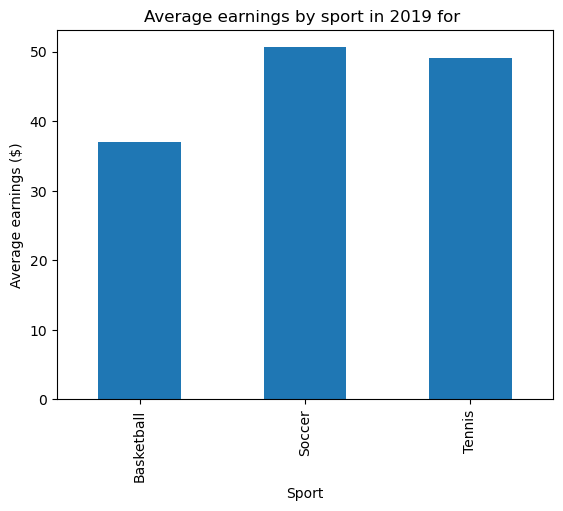

Sport
Basketball    36.931429
Soccer        50.583333
Tennis        49.100000
Name: Earnings, dtype: float64

In [16]:
# Data visualization and summaries
#Type: CSV (Type #1)
#Source: https://www.kaggle.com/datasets/darinhawley/forbes-high-paid-athletes-19902021
#Note: Kaggle dataset 'Forbes Highest Paid Athlethes 1990-2021' (Source #2)

import pandas as pd
import matplotlib.pyplot as plt

#Function 5: 'earnings_vis'
#Inputs: year, sports, nationality(Country)
#Description:
# Provides the average earnings by sport for a given year and nationality as expressed by a bar graph and 
# tabular chart. Nationality is an optional field. Given data limitations in the forbes dataset, the most 
# descriptive results are outputted when you don't filter by nationality and you specify more than one popular 
# sport. Good sports to test are ['Soccer','Tennis','Basketball'] as they all have athletes represented in the 
# forbes data. Also when specifying nationality in this particular function, some are codes ie. USA, UK and others
# are full names ie. Brazil, Argentina, Russia.
def earnings_vis(year, sports, nationality=None):
    
    # Read the file into a pandas DataFrame
    data = pd.read_csv('Forbes_Athletes_1990_2021.csv')

    # Define the sports to include list
    sports_to_include = []

    #append the user inputted sports to the list
    for sport in sports:
        sports_to_include.append(sport)
    
    # Filter the data to only include rows where the sport is in the defined list and equal to the input year
    data = data[(data['Sport'].isin(sports_to_include)) & (data['Year'] == int(year))]

    # Filter the data further by nationality if a value is provided for that parameter
    if nationality:
        data = data[data['Nationality'] == nationality]

    # Calculate the average earnings from the filtered data
    avg_earnings = data.groupby('Sport')['Earnings'].mean()

    # Display the filtered contents of the file and the average earnings
    print(data)
    print("Average earnings by sport: \n", avg_earnings)

    # Create a bar chart of the average earnings by sport
    avg_earnings.plot(kind='bar')
    plt.title(f"Average earnings by sport in {year} for {nationality}")
    plt.xlabel("Sport")
    plt.ylabel("Average earnings ($)")
    plt.show()

    # Return the average earnings by sport as a pandas series
    return avg_earnings

#Define inputs and run function
year = input("Enter the year: ")
sports = input("Enter the sports (separated by comma): ").split(",")
nationality = input("Enter the nationality (optional): ")
earnings_vis(year, sports, nationality)
